# Stack Overflow Surveys

## 1. Load datasets

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
plt.style.use('./style/minimal.mplstyle')
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [3]:
root = 'data/zipped_folder/survey_results_public_'

df_11 = pd.read_csv(root + '2011.csv', header=1, dtype=str)
df_12 = pd.read_csv(root + '2012.csv', header=1, dtype=str)
df_13 = pd.read_csv(root + '2013.csv', header=1, dtype=str)
df_14 = pd.read_csv(root + '2014.csv', header=1, dtype=str)
df_15 = pd.read_csv(root + '2015.csv', header=1, dtype=str)
df_16 = pd.read_csv(root + '2016.csv')
df_17 = pd.read_csv(root + '2017.csv')
df_18 = pd.read_csv(root + '2018.csv')
df_19 = pd.read_csv(root + '2019.csv')
df_20 = pd.read_csv(root + '2020.csv')
df_21 = pd.read_csv(root + '2021.csv')

In [4]:
df_21.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-employed",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",18 - 24 years,"Coding Bootcamp;Other online resources (ex: videos, blogs, etc)",NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow;Go for a walk or other physical activity;Google it,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);School",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);Online Forum",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;Visual Studio Code,IPython/Jupyter;RStudio;Sublime Text;Visual Studio Code,MacOS,Visit Stack Overflow;Google it;Watch help / tutorial videos;Do other work and come back later,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow;Go for a walk or other physical activity;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-employed",United Kingdom of Great Britain and Northern Ireland,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Devel

## 2. Exploratory data analysis

Questions:

1. How many survey respondents per year?
2. How many caffeinated beverages per day?
3. Tabs or spaces? (2015 and 2017)
4. How much do you agree or disagree with the following statement? I want to go to Mars right now, even if there's a chance I never come back.
5. Star Wars or Star Trek?
6. Dogs or cats?
7. Do you believe in aliens?
8. How do you pronouce "GIF"?
9. Are you the "IT support person" for your family?

### 2.1. Selecting questions

In [5]:
# How many caffeinated beverages per day?
q2 = df_15['How many caffeinated beverages per day?'].value_counts()
q2

0               3916
2               3587
1               2844
3               2492
4               1535
5               1099
6                456
More than 10     219
8                170
7                154
9                 38
Name: How many caffeinated beverages per day?, dtype: int64

In [6]:
# Tabs or spaces?
q3_15 = df_15['Tabs or Spaces'].value_counts()
q3_15

Tabs          11604
Spaces         8663
It depends     4391
Huh?           1149
Name: Tabs or Spaces, dtype: int64

In [7]:
# Tabs or spaces?
q3_17 = df_17['TabsSpaces'].value_counts()
q3_17

Tabs      16682
Spaces    14667
Both       7502
Name: TabsSpaces, dtype: int64

In [8]:
q3_15.rename('2015', inplace=True)
q3_17.rename('2017', inplace=True)

q3 = pd.concat([q3_15, q3_17], axis=1)
q3

,2015,2017
Tabs,11604.0,16682.0
Spaces,8663.0,14667.0
It depends,4391.0,NaN
Huh?,1149.0,NaN
Both,NaN,7502.0


In [9]:
# How much do you agree or disagree with the following statement?
# I want to go to Mars right now, even if there's a chance I never come back.
q4 = df_16['agree_mars'].value_counts()
q4

Disagree completely    21567
Disagree somewhat       6463
Neutral                 5217
Agree completely        4977
Agree somewhat          4461
Name: agree_mars, dtype: int64

In [10]:
# Star Wars or Star Trek?
q5 = df_16['star_wars_vs_star_trek'].value_counts()
q5

Star Wars               22410
Star Trek                8148
Star Wars; Star Trek     3840
Name: star_wars_vs_star_trek, dtype: int64

In [11]:
# Dogs or cats?
q6 = df_16['dogs_vs_cats'].value_counts()
q6

Dogs                      22101
Cats                      15740
Other (please specify)     7398
Name: dogs_vs_cats, dtype: int64

In [12]:
# Do you believe in aliens?
q7 = df_16['aliens'].value_counts()
q7

Yes                       25742
No                        17243
Other (please specify)     6192
Name: aliens, dtype: int64

In [13]:
# How do you pronouce "GIF"?
q8 = df_17['PronounceGIF'].value_counts()
q8

With a hard "g," like "gift"              33484
With a soft "g," like "jiff"              13408
Enunciating each letter: "gee eye eff"     3085
Some other way                             1031
Name: PronounceGIF, dtype: int64

In [14]:
# Are you the "IT support person" for your family?
q9 = df_19['ITperson'].value_counts()
q9

Yes                                         46370
SIGH                                        21819
Also Yes                                    12313
Fortunately, someone else has that title     6639
Name: ITperson, dtype: int64

## 3. Data preparation

### 3.1. Adjusting labels

In [15]:
# Dropping uncomparable items (2017 survey doesn't have 'Huh?')
q3.drop(labels=['Huh?'], inplace=True)

In [16]:
# Standardizing and simplifiyng labels
q3.rename({'It depends': 'Both'}, inplace=True)
q5.rename({'Star Wars; Star Trek': 'Both'}, inplace=True)
q6.rename({'Other (please specify)': 'Other'}, inplace=True)
q7.rename({'Other (please specify)': 'Other'}, inplace=True)
q9.rename({'SIGH': 'Sigh'}, inplace=True)

In [17]:
# Combining rows with same label to remove NaNs
q3 = q3.groupby(q3.index).sum()

In [18]:
# Ordering in a more intuitive way
q2 = q2.reindex(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'More than 10'])
q3 = q3.reindex(['Tabs', 'Spaces', 'Both'])
q4 = q4.reindex(['Disagree completely', 'Disagree somewhat', 'Neutral', 'Agree somewhat', 'Agree completely'])
q9 = q9.reindex(['Yes', 'Also Yes', 'Sigh', 'Fortunately, someone else has that title'])

In [19]:
# Breaking label lines to fit on the charts
q2.rename({'More than 10': 'More\nthan\n10'}, inplace=True)

q4.rename({'Disagree completely': 'Disagree\ncompletely',
           'Disagree somewhat': 'Disagree\nsomewhat',
           'Agree somewhat': 'Agree\nsomewhat',
           'Agree completely': 'Agree\ncompletely'}, inplace=True)

q5.rename({'Star Wars': 'Star\nWars',
           'Star Trek': 'Star\nTrek'}, inplace=True)

q8.rename({'With a hard "g," like "gift"': 'With a hard "g",\nlike "gift"',
           'With a soft "g," like "jiff"': 'With a soft "g",\nlike "jiff"',
           'Enunciating each letter: "gee eye eff"': 'Enunciating each letter:\n"gee eye eff"'}, inplace=True)

q9.rename({'Fortunately, someone else has that title': 'Fortunately, someone\nelse has that title'}, inplace=True)

### 3.2. Getting x and y values

In [20]:
q1_x = list(range(2011, 2022))

surveys = [df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19,
           df_20, df_21]
q1_y = []
for survey in surveys:
    rows = survey.shape[0]
    q1_y.append(rows)

In [21]:
# The convention used is labels as x and values as y
q2_x = q2.index.tolist()
q2_y = q2.to_list()

q3_x = q3.columns.tolist()
q3_y_t = q3.loc['Tabs'].tolist()
q3_y_s = q3.loc['Spaces'].tolist()
q3_y_b = q3.loc['Both'].tolist()
q3_l = q3.index.tolist()  # Legend

q4_x = q4.index.tolist()
q4_y = q4.to_list()

q5_x = q5.index.tolist()
q5_y = q5.to_list()

q6_x = q6.index.tolist()
q6_y = q6.to_list()

q7_x = q7.index.tolist()
q7_y = q7.to_list()

q8_x = q8.index.tolist()
q8_y = q8.to_list()

q9_x = q9.index.tolist()
q9_y = q9.to_list()

### 3.3. Transforming into percentages

In [22]:
def get_percentages(abs_values):
    """
    Transform a list of absolute numbers into percentages of the total sum.
    
    Parameters:
        abs_values (list of floats): A list with absolute numbers.
    
    Return:
        per_values (list of floats): A list with the percentage of each
            absolute number regarding the total sum.
    """
    
    np_abs_values = np.array(abs_values)
    total = np.sum(np_abs_values, axis=0)
    per_values = list(np_abs_values/total)

    return per_values

In [23]:
q2_y_per = get_percentages(q2_y)
q4_y_per = get_percentages(q4_y)
q5_y_per = get_percentages(q5_y)
q6_y_per = get_percentages(q6_y)
q7_y_per = get_percentages(q7_y)
q8_y_per = get_percentages(q8_y)
q9_y_per = get_percentages(q9_y)

In [24]:
q3_y_t_abs = np.array(q3_y_t)
q3_y_s_abs = np.array(q3_y_s)
q3_y_b_abs = np.array(q3_y_b)

total = np.sum([q3_y_t_abs, q3_y_s_abs, q3_y_b_abs], axis=0)

q3_y_t_per = list(q3_y_t_abs/total)
q3_y_s_per = list(q3_y_s_abs/total)
q3_y_b_per = list(q3_y_b_abs/total)

q3_y_per = [q3_y_t_per, q3_y_s_per, q3_y_b_per]

## 4. Visualizations

In [25]:
def calc_bar_positions(classes, space=1/2):
    """
    Calculate the coordinates and size of bars, given a desired space.
    
    Parameters:
        classes (list of strings): A list of the major tick labels for the x
            or y axis. In other words, the classes.
        space (float): The space between bars, in terms of the size (width or
            height) of them.
    
    Return:
        coords (list of floats): A list with the x or y coordinates to
            position the bars.
        size (float): The width of the bar (x axis) or the height of the bar
            (y axis).
    
    Example:
        Let's say there are 2 classes in the y axis, and we want to generate y
        coordinates to position them, with spaces with 1/4 of their height
        between them and the axis limits. First, we need to calculate the
        space unit, with the following equation:
        
        space_unit = 1/(1 + 2*(space) + (n - 1)*(1 + space))
        
        Where:
        
        Space unit: The size of a single space. It's the fraction that a bar
            occupies on an axis with a size of 1 and a given ammount of space
            between the bars.
        Numerator: The total size of the x or y axis, always 1.
        Denominator: The number of spaces to divide the axis by.
        
        This would give us as a space unit of 1/2.75. The details of how to
        calculate the denominator are:
        
        1/4 (from the bottom of the y axis to the bottom of the first bar)
        + 1 (height of the first bar)
        + 1/4 (space between bars)
        + 1 (height of the second bar)
        + 1/4 (from the top of the second bar to the top of the y axis)
        = 2.75
        
        Then, we would need to use the space unit to calculate the x or y
        coordinate for each bar, with the following equation:
        
        coordinate = space_unit*(1/2 + space + i*(1 + space))
        
        To calculate the y coordinate for the second bar, it would be:
        
        1/4 (from the bottom of the y axis to the bottom of the first bar)
        + 1 (height of the first bar)
        + 1/4 (space between bars)
        + 1/2 (half of the height of the second bar)
        = 2
    """
    n = len(classes)
    space_unit = 1/(1 + 2*(space) + (n - 1)*(1 + space))
    
    # List with the coordinate of every bar
    coords = []
    for i in range(n):
        # Calculate the coordinate to position the bar
        coords.append(space_unit*(1/2 + space + i*(1 + space)))

    size = space_unit
    
    return coords, size

In [26]:
def annotate_plot(text, xy, xytext, **kwargs):
    """
    Annotate the point xy with text and offset it.
    
    Parameters:
        text (string): The text to be annotated.
        xy (tuple of floats): The x and y coordinates to place the text.
        xytext (tuple of floats): The ammount of x and y points to offset the
            text.
        **kwargs: Accepts any keyword argument from the annotate function.
    
    Return:
        None.
    """
    plt.gca().annotate(text,  # This is the text
                       xy,  # These are the coordinates to position the label
                       textcoords='offset points',  # How to position the text
                       xytext=xytext,  # Distance from text to points (x, y)
                       fontsize=11,
                       **kwargs)
    return

In [27]:
def style_vertical():
    """Apply a minimalist style to a vertical bar chart plot"""
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}'))
    plt.gca().tick_params(bottom=False, width=1)
    plt.gca().spines['bottom'].set_visible(False)
    return

In [28]:
def style_horizontal():
    """Apply a minimalist style to a horizontal bar chart plot"""
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}'))
    plt.gca().tick_params(left=False, width=1)
    plt.gca().spines['left'].set_visible(False)
    return

In [29]:
def plot_line(x, y, title, xlabel, ylabel, xlim, ylim, **kwargs):
    """
    Plot a line chart with a minimalist style.
    
    Parameters:
        x (list of floats): A list with the x values to plot.
        y (list of floats): A list with the y values to plot.
        title (string): The title of the chart.
        xlabel (string): The name of the x axis metric.
        ylabel (string): The name of the y axis metric.
        xlim (tuple of floats): A tuple with the left and right limits for
            the x axis.
        ylim (tuple of floats): A tuple with the bottom and top limits for
            the y axis.
        **kwargs: Accepts any keyword argument from the figure function.
    
    Return:
        fig (figure): A figure with the final plot stored.
    """
    fig = plt.figure(**kwargs)
    
    plt.plot(x, y)
    
    plt.title(title)
    # Add a 0.1 margin to avoid trimming the round end of the line
    xlim = (xlim[0], xlim[1] + 0.1)
    plt.xlim(xlim)
    plt.ylim(ylim)
    # Right align the xlabel to the last major tick label
    plt.xlabel(xlabel, va='top', ha='right', x=1.015)
    # Vertically align the ylabel to the last major tick label
    plt.ylabel(ylabel, va='bottom', ha='right', y=1.026)
    # Show major ticks as multiples of 1 on the x axis
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
    # Hide the spine inside the 0.1 x axis margin
    plt.gca().spines['bottom'].set_bounds(xlim)
    plt.tight_layout(h_pad=4, w_pad=4)
    plt.show()
    
    return fig

In [30]:
def plot_bar(x, y, title, horizontal=False, xlim=(0, 1), ylim=(0, 1),
             space=1/2, **kwargs):
    """
    Plot a bar chart with a minimalist style.
    
    Parameters:
        x (list of strings): A list with the name of the labels of the
            classes.
        y (list of floats): A list with the y values of each class.
        title (string): The title of the chart.
        horizontal (bool): The orientation of the chart. The default is False,
            which is vertical.
        xlim (tuple of floats): A tuple with the left and right limits for
            the x axis. The default is (0, 1), useful for percentages.
        ylim (tuple of floats): A tuple with the bottom and top limits for
            the y axis. The default is (0, 1), useful for percentages.
        space (float): The space between bars, in terms of the size (width or
            height) of them.
        **kwargs: Accepts any keyword argument from the figure function.
    
    Return:
        fig (figure): A figure with the final plot stored.
    """
    fig = plt.figure(**kwargs)
    coords, size = calc_bar_positions(x, space)
    
    if horizontal:
        plt.barh(coords[::-1], y, height=size)
        plt.yticks(coords[::-1], x)
        style_horizontal()
    else:
        plt.bar(coords, y, width=size)
        plt.xticks(coords, x)
        style_vertical()
    
    # Styling and showing the chart
    plt.title(title)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.tight_layout(h_pad=4, w_pad=4)
    plt.show()
    
    return fig

In [31]:
def plot_slope(dates, series, legends, title, ylim=(0, 1), **kwargs):
    """
    Plot a slopegraph with a minimalist style.
    
    Parameters:
        dates (list of strings): A list with two date labels, always.
        series (list of list of floats): A list with other lists inside,
            each one with the y values from a specific class.
        legends (list of strings): A list with the legend of each class.
        title (string): The title of the chart.
        ylim (tuple of floats): A tuple with the bottom and top limits for
            the y axis. The default is (0, 1), useful for percentages.
        **kwargs: Accepts any keyword argument from the figure function.
    
    Return:
        fig (figure): A figure with the final plot stored.
    """
    fig = plt.figure(**kwargs)
    
    items = zip(series, legends)
    for item in items:
        # Create variables for more readability
        single_series = item[0]
        legend = item[1]
        
        plt.plot(dates, single_series, 'o-', markersize=10)
        
        # Pick the label color from the style sheet file
        color = mpl.rcParams['axes.labelcolor']
        labels = zip(dates, single_series)
        for i, (x, y) in enumerate(labels):
            label = '{:.0%}'.format(y)
            
            if i % 2 == 0:  # First date label
                annotate_plot(label, (x, y), (-10, 0), ha='right',
                              va='center', color=color)
                annotate_plot(legend, (x, y), (-45, 0), ha='right',
                              va='center', color=color)
            else:  # Second date label
                annotate_plot(label, (x, y), (10, 0), ha='left',
                              va='center', color=color)
    
    # Styling and showing the chart
    plt.title(title)
    plt.ylim(ylim)
    plt.margins(x=0.05)
    plt.tick_params(left=False, width=1)
    plt.gca().yaxis.set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_bounds((0, 1))
    plt.tight_layout(h_pad=4, w_pad=4)
    plt.show()
    
    return fig

In [32]:
def plot_hor_stacked_bars(values, legends, title, bar_colors, leg_colors,
                          xlim=(0, 1), ylim=(0, 1), **kwargs):
    """
    Plot horizontal stacked bars chart with a minimalist style.
    
    Parameters:
        values (list of floats): A list with the size of each bar.
        legends (list of strings): A list with the legend of each bar.
        bar_colors (list of strings): A list with the bar colors in the
            hexadecimal format, including the #.
        leg_colors (list of strings): A list with legend colors in the
            hexadecimal format, including the #.
        xlim (tuple of floats): A tuple with the left and right limits for
            the x axis. The default is (0, 1), useful for percentages.
        ylim (tuple of floats): A tuple with the bottom and top limits for
            the y axis. The default is (0, 1), useful for percentages.
        **kwargs: Accepts any keyword argument from the figure function.
    
    Return:
        fig (figure): A figure with the final plot stored.
    """
    fig = plt.figure(**kwargs)
    
    # Store the position from which the bars begin
    left = 0
    for item in zip(values, legends, bar_colors, leg_colors):
        # Create variables for more readability
        value = item[0]
        legend = item[1]
        bar_color = item[2]
        leg_color = item[3]
        
        rect = plt.barh(y=3/4, width=value, height=1, left=left,
                        color=bar_color)
        
        # Put the legend in the middle of each bar
        xy= (rect[0].get_x() + rect[0].get_width()/2,
             rect[0].get_y() + rect[0].get_height())

        annotate_plot(legend, xy, (0, 5), ha='center', va='bottom',
                      color=leg_color)
        left += value
    
    # Styling and showing the chart
    style_horizontal()
    plt.title(title)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.1))
    plt.gca().yaxis.set_visible(False)
    plt.tight_layout(h_pad=4, w_pad=4)
    plt.show()
    
    return fig

In [33]:
# Titles
t1 = 'How many survey respondents per year?'
t2 = 'How many caffeinated beverages per day?'
t3 = 'Tabs or spaces?'
t4 = "How much do you agree or disagree with the following statement?\nI want to go to Mars right now, even if there's a chance I never come back."
t5 = 'Star Wars or Star Trek?'
t6 = 'Dogs or cats?'
t7 = 'Do you believe in aliens?'
t8 = 'How do you pronouce "GIF"?'
t9 = 'Are you the "IT support person" for your family?'

### 4.1. Survey respondents

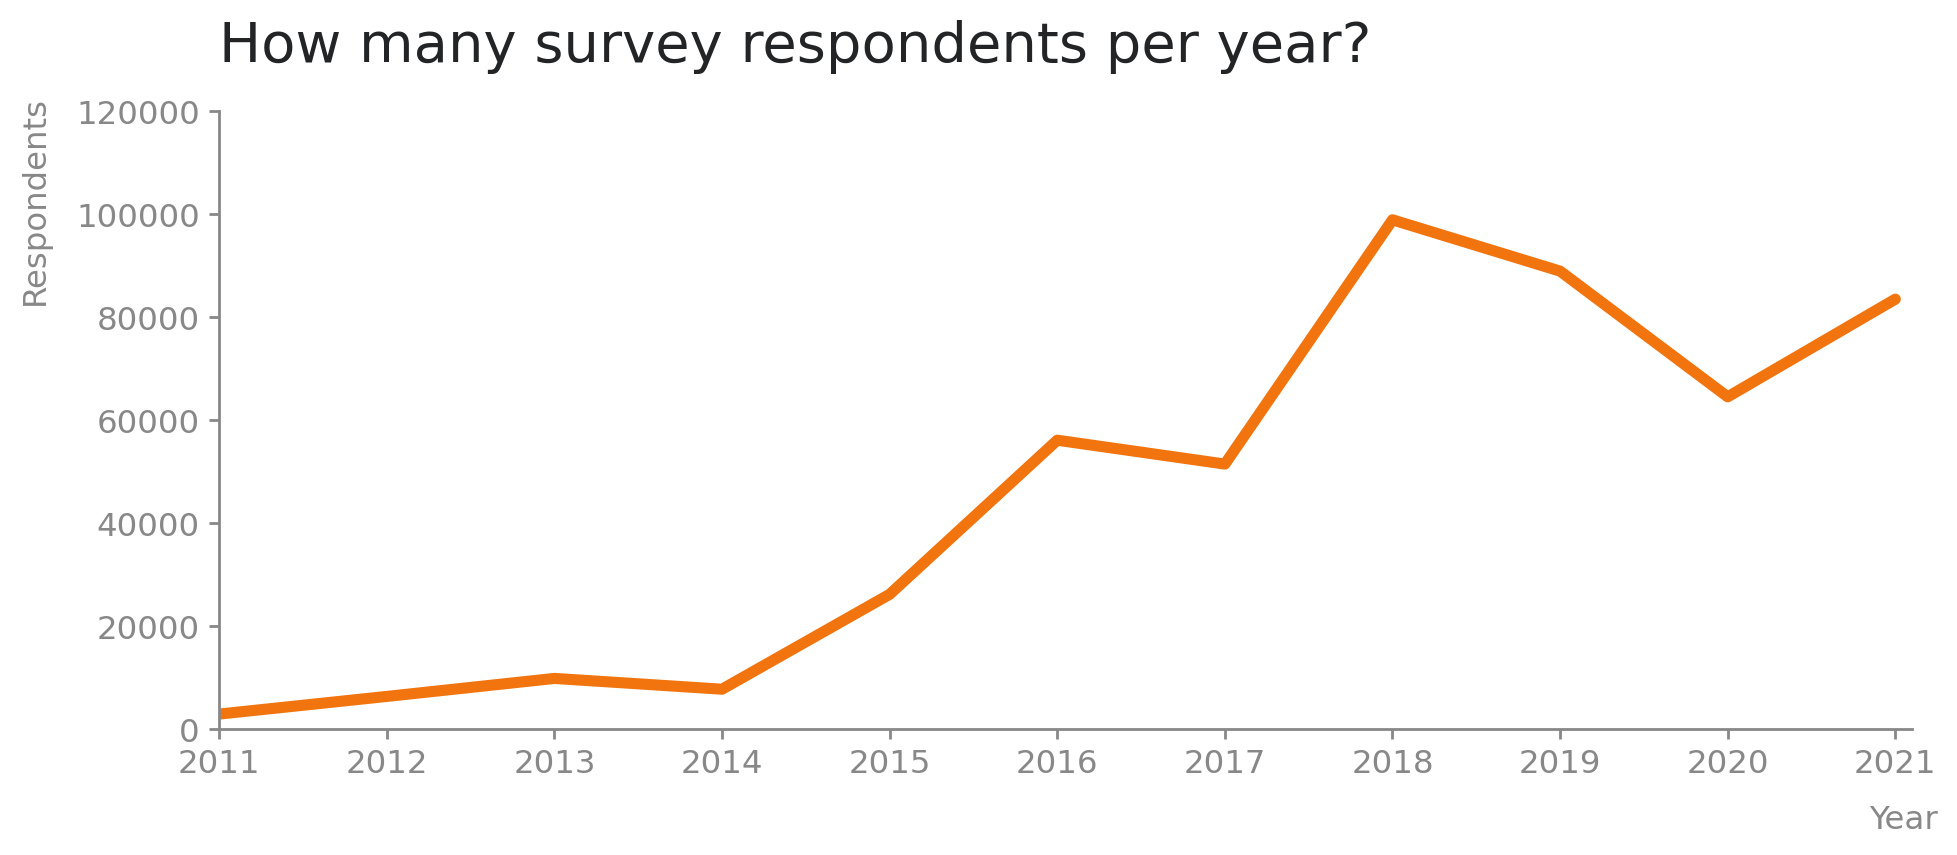

In [34]:
fig1 = plot_line(q1_x,
                 q1_y,
                 t1,
                 xlabel='Year',
                 ylabel='Respondents',
                 xlim=(2011, 2021),
                 ylim=(0, 120000),
                 figsize=(10, 4.5))

### 4.2. Caffeinated beverages

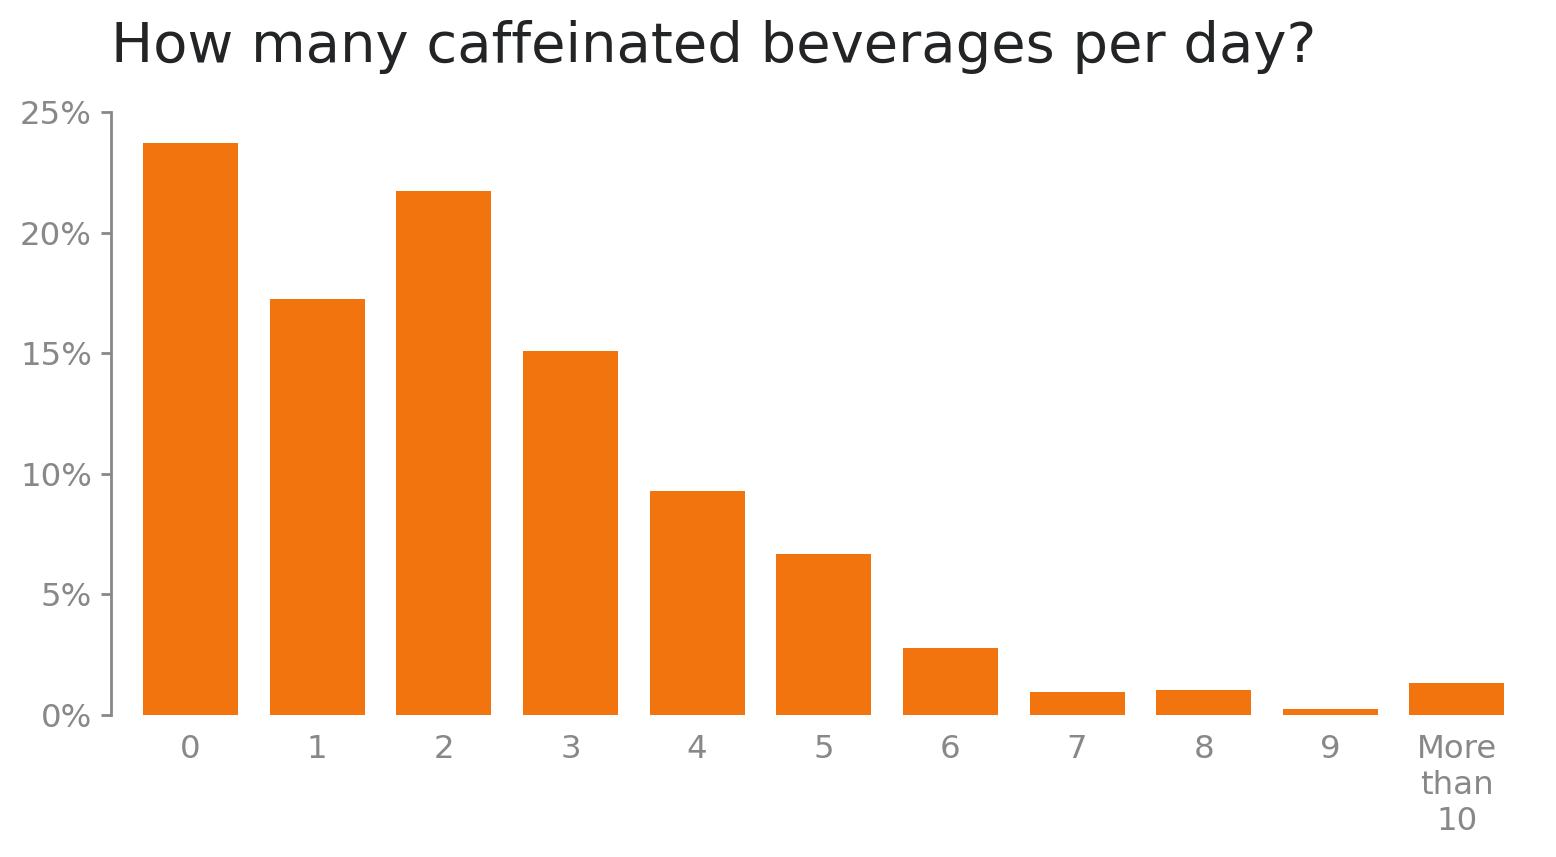

In [35]:
fig2 = plot_bar(q2_x,
                q2_y_per,
                t2,
                ylim=(0, 0.25),
                space=1/3)

### 4.3. Tabs or spaces

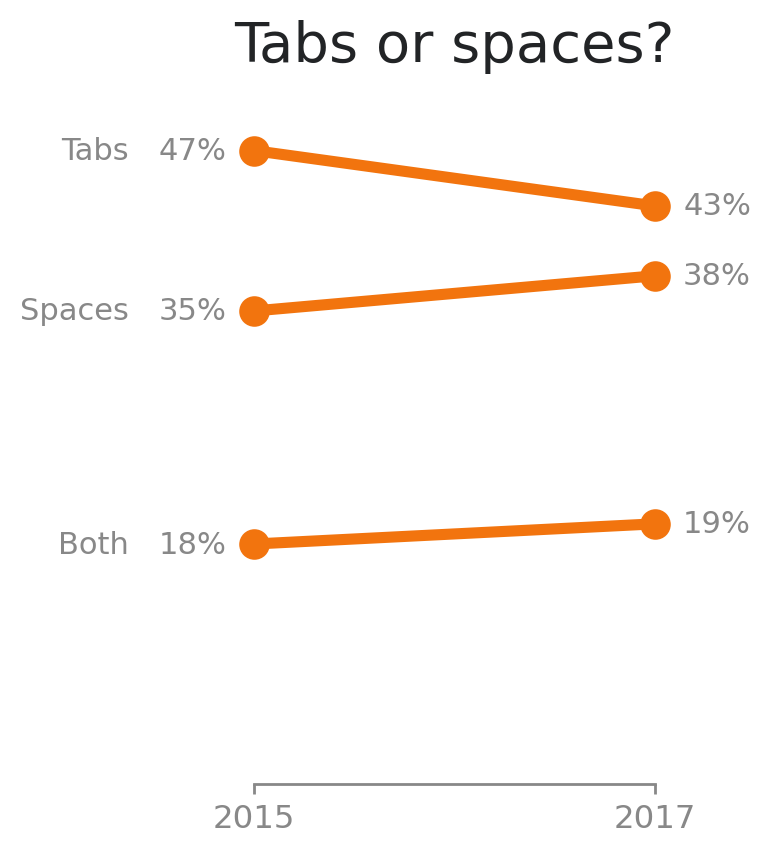

In [36]:
fig3 = plot_slope(q3_x,
                  q3_y_per,
                  q3_l,
                  t3,
                  ylim=(0, 0.5),
                  figsize=(4, 4.5))

### 4.4. Desire to go to Mars

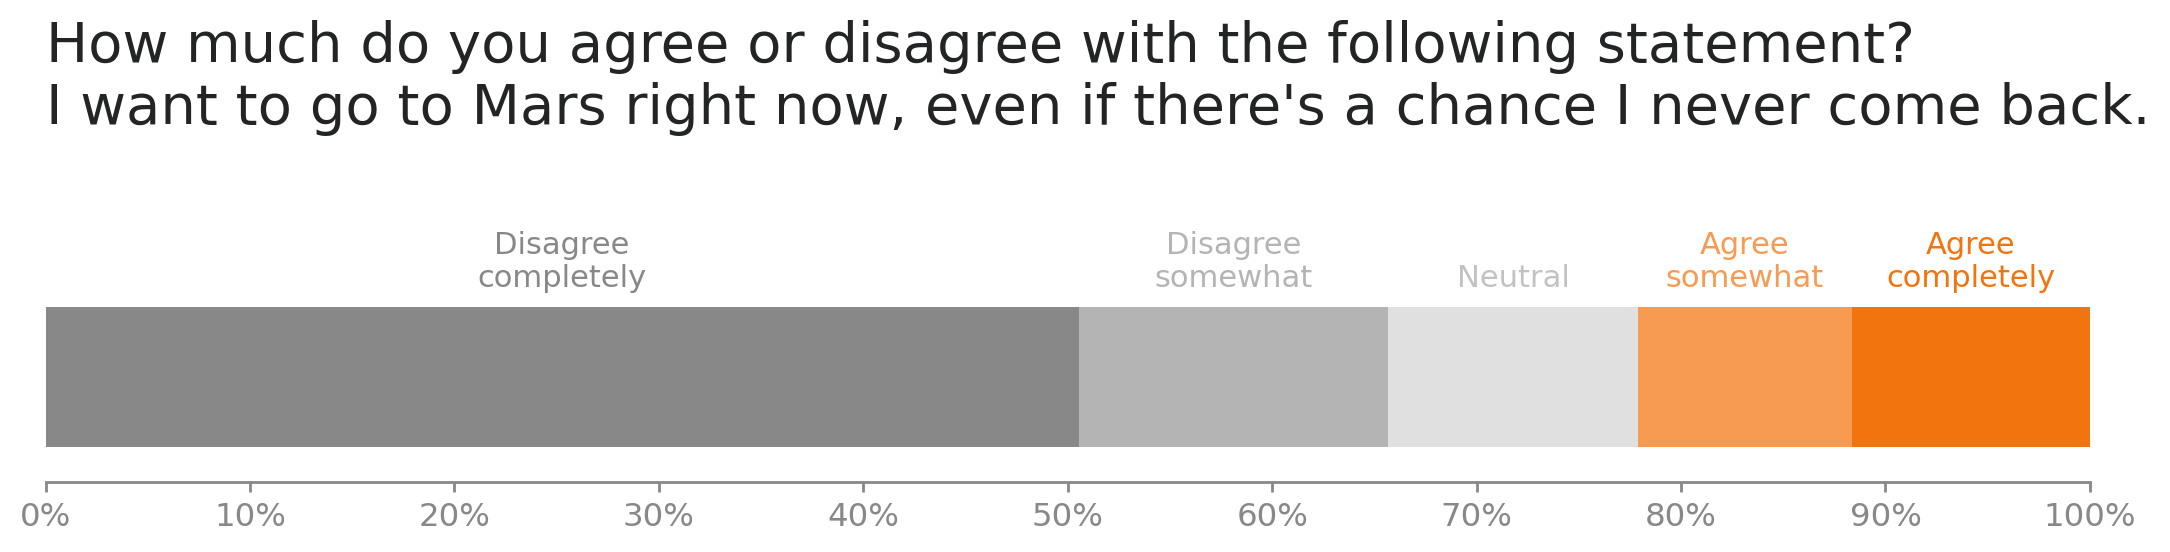

In [37]:
# Defining a color pallete to plot the chart
bar_colors = ['#888888', '#B4B4B4', '#E0E0E0', '#F69B51', '#F2740E']

# C2C2C2 is darker and more readable than E0E0E0
leg_colors = bar_colors.copy()
leg_colors[2] = '#C2C2C2'

fig4 = plot_hor_stacked_bars(q4_y_per,
                             q4_x,
                             t4,
                             bar_colors,
                             leg_colors,
                             ylim=(0, 2.2),
                             figsize=(11, 3))

### 4.5. Star Wars or Star Trek

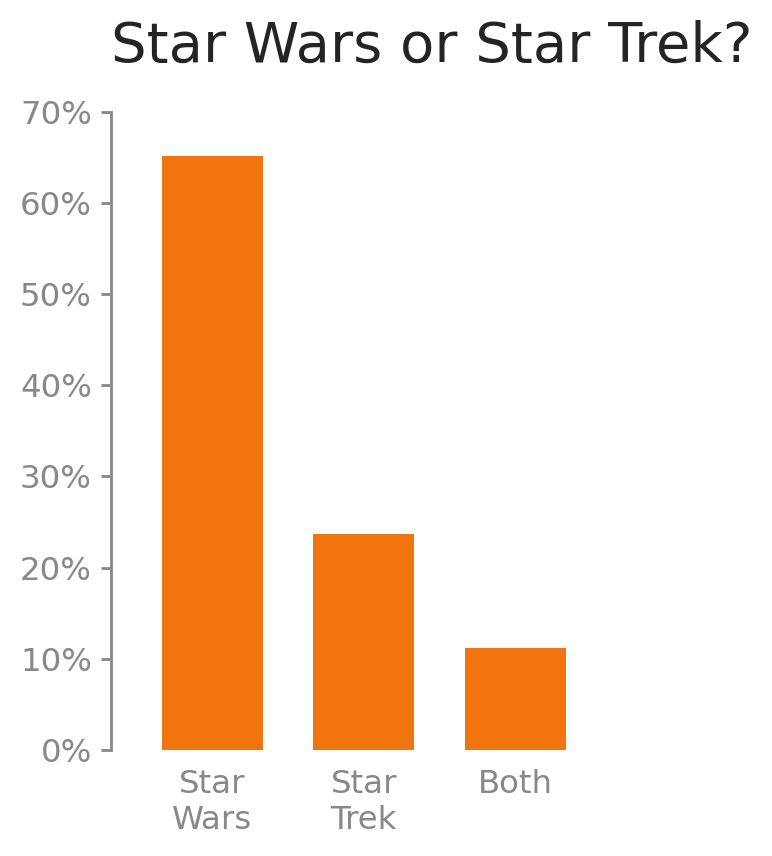

In [38]:
fig5 = plot_bar(q5_x,
                q5_y_per,
                t5,
                ylim=(0, 0.7),
                figsize=(3.4, 4.5))

### 4.6. Dogs or cats

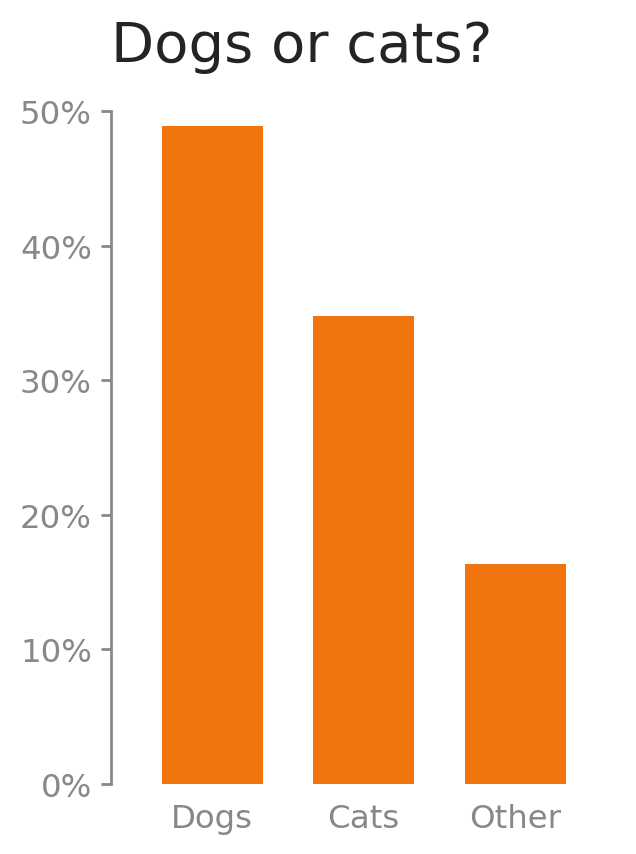

In [39]:
fig6 = plot_bar(q6_x,
                q6_y_per,
                t6,
                ylim=(0, 0.5),
                figsize=(3.4, 4.5))

### 4.7. Aliens belief

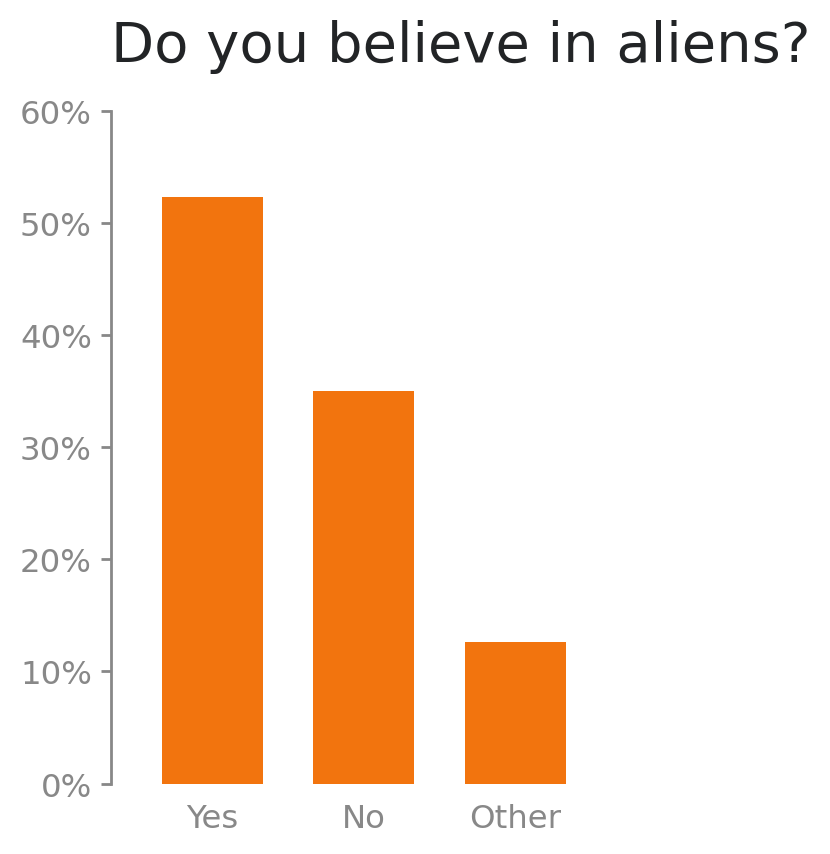

In [40]:
fig7 = plot_bar(q7_x,
                q7_y_per,
                t7,
                ylim=(0, 0.6),
                figsize=(3.4, 4.5))

### 4.8. GIF pronunciation

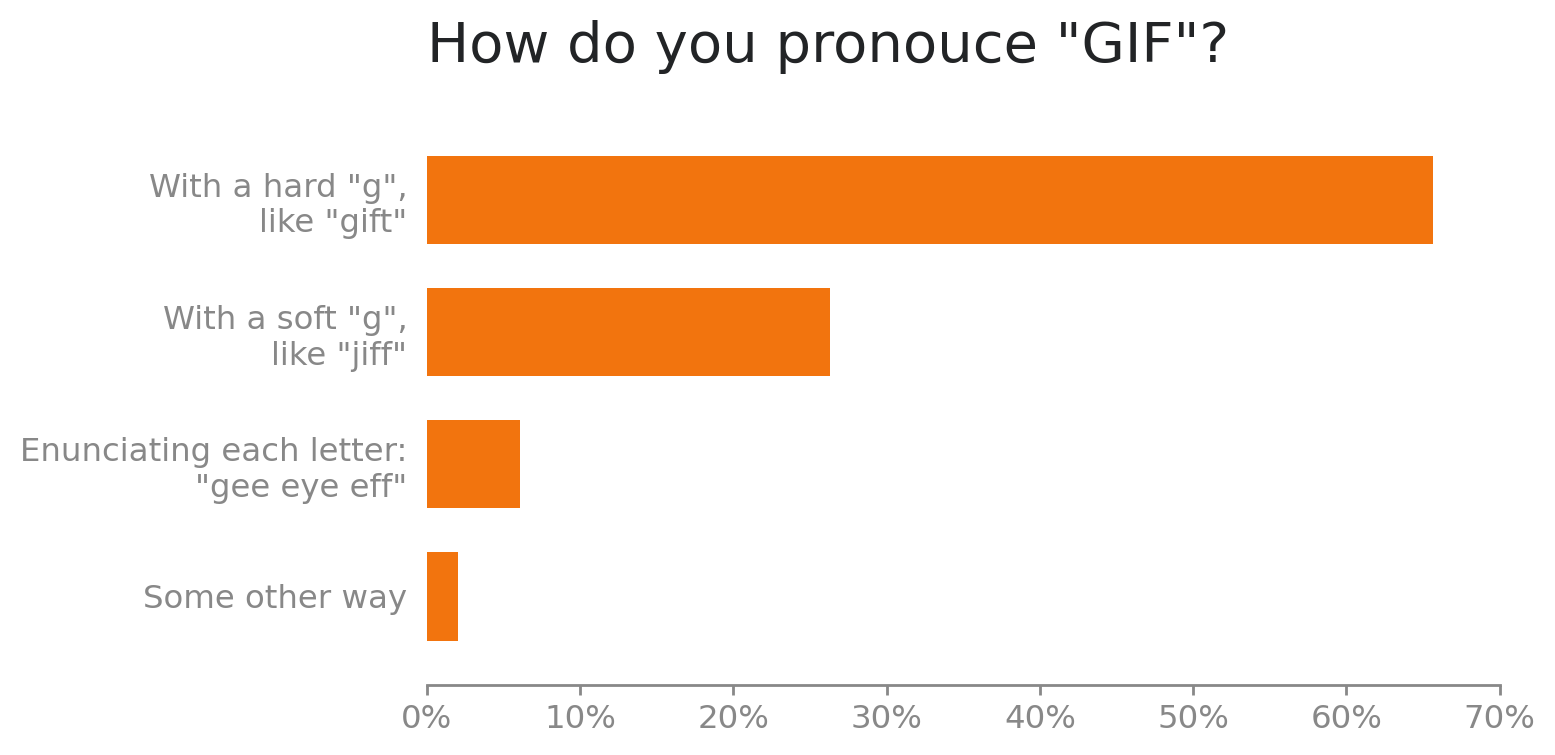

In [41]:
fig8 = plot_bar(q8_x,
                q8_y_per,
                t8,
                horizontal=True,
                xlim=(0, 0.7),
                figsize=(8, 4))

### 4.9. IT support person

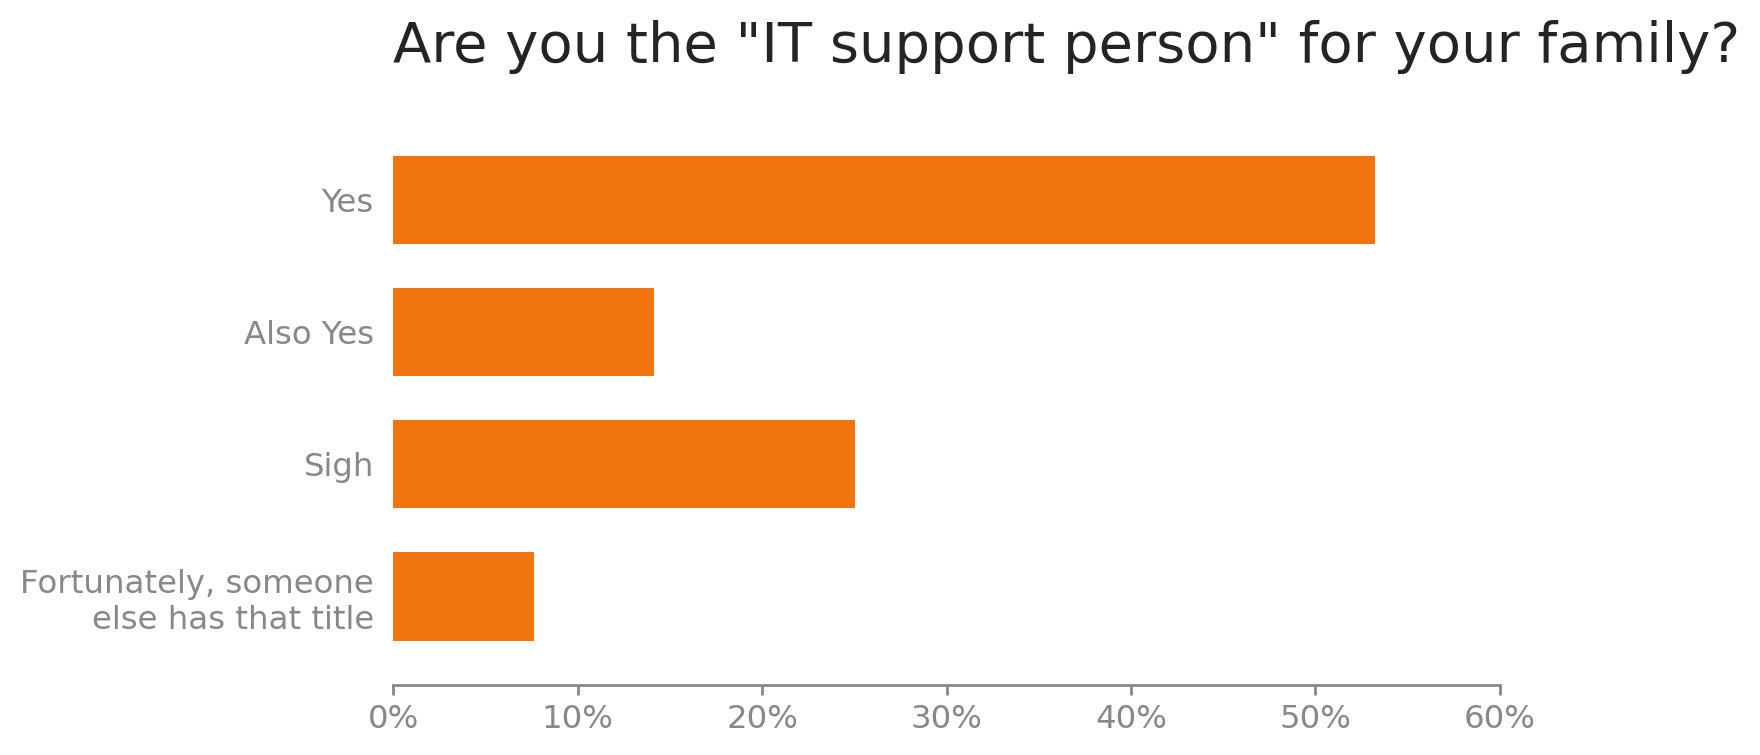

In [42]:
fig9 = plot_bar(q9_x,
                q9_y_per,
                t9,
                horizontal=True,
                xlim=(0, 0.6),
                figsize=(8, 4))

## 5. Export images

In [43]:
figures = [fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8, fig9]

file_names = ['q1_survey_respondents',
              'q2_caffeinated_beverages',
              'q3_tabs_or_spaces',
              'q4_desire_to_go_to_mars',
              'q5_star_wars_or_star_trek',
              'q6_dogs_or_cats',
              'q7_aliens_belief',
              'q8_gif_pronunciation',
              'q9_it_support_person'
]

In [44]:
for item in zip(figures, file_names):
    fig = item[0]
    file_name = item[1]
    fig.savefig(f'images/{file_name}.png', bbox_inches='tight', dpi=500)